 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [43]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [44]:
# Reading whale returns
whale_returns_CSV= Path ('Resources/whale_returns.csv')
whale_returns=pd.read_csv(whale_returns_CSV,index_col="Date",parse_dates=True, infer_datetime_format=True)
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [45]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [46]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [47]:
# Reading algorithmic returns
Algo_returns_CSV= Path ('Resources/algo_returns.csv')
Algo_returns=pd.read_csv(Algo_returns_CSV,index_col="Date",parse_dates=True, infer_datetime_format=True)
Algo_returns.sort_index(ascending = True, inplace = True)
Algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [48]:
# Count nulls
Algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [49]:
# Drop nulls
Algo_returns.dropna(inplace=True)
Algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [50]:
# Reading S&P 500 Closing Prices
SP500_returns_CSV= Path ('Resources/sp500_history.csv')
SP500_returns=pd.read_csv(SP500_returns_CSV,index_col="Date",parse_dates=True, infer_datetime_format=True)
SP500_returns.sort_index(ascending = True, inplace = True)
SP500_returns.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [51]:
# Check Data Types
SP500_returns.dtypes

Close    object
dtype: object

In [52]:
# Fix Data Types
SP500_returns["Close"]= SP500_returns["Close"].str.replace('$','').astype("float")
SP500_returns.sort_index(inplace = True)
SP500_returns.head()
##Data is cleanned and type is also changed to float

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [53]:
# Calculate Daily Returns
SP500_daily_returns=SP500_returns.pct_change()

In [54]:
# Drop nulls
SP500_daily_returns.dropna(inplace=True)
SP500_daily_returns.head()


,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [55]:
# Rename `Close` Column to be specific to this portfolio.
SP500_daily_returns.rename(columns={"Close":"SP_500"},inplace=True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [56]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df_combine = pd.concat([whale_returns, Algo_returns,SP500_daily_returns], axis = "columns",join = "inner")

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily_Returns'}, xlabel='Date'>

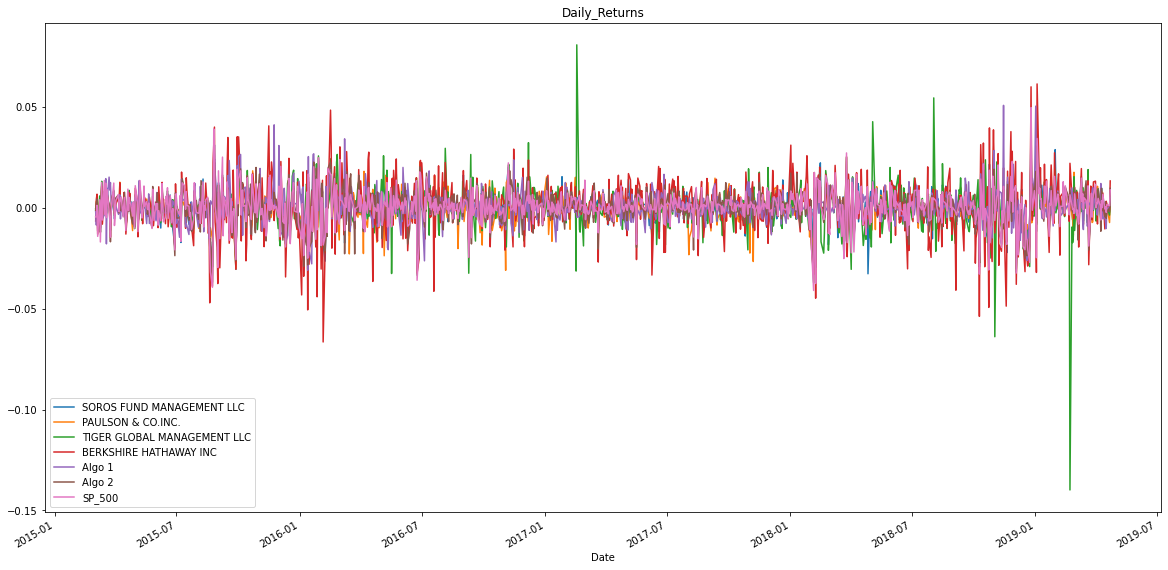

In [57]:
# Plot daily returns of all portfolios
df_combine.plot(figsize=(20,10), title="Daily_Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

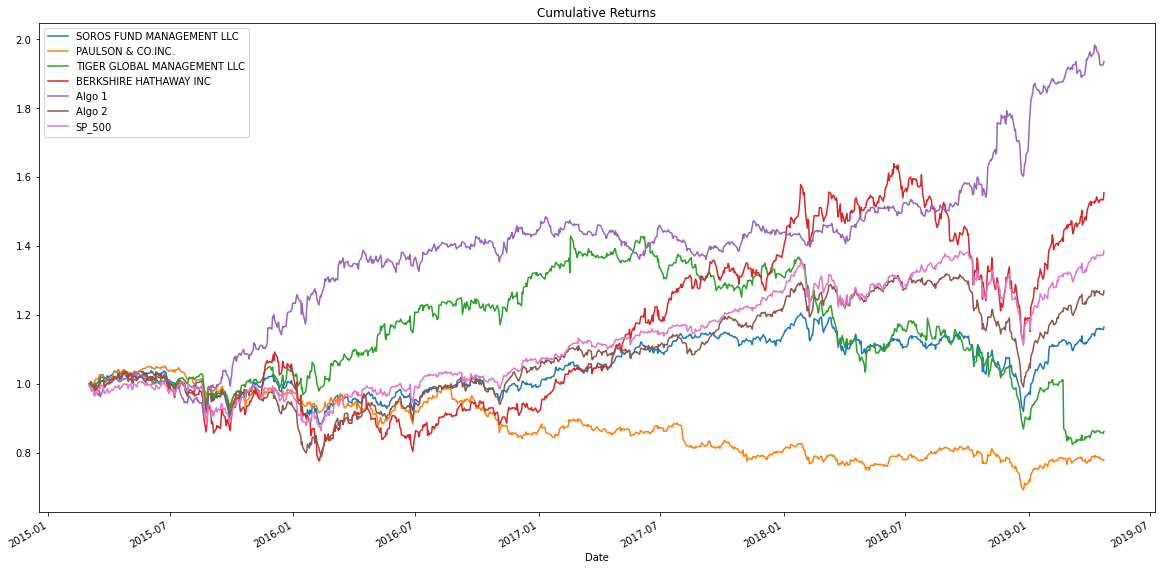

In [58]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + df_combine).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize = (20,10), title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

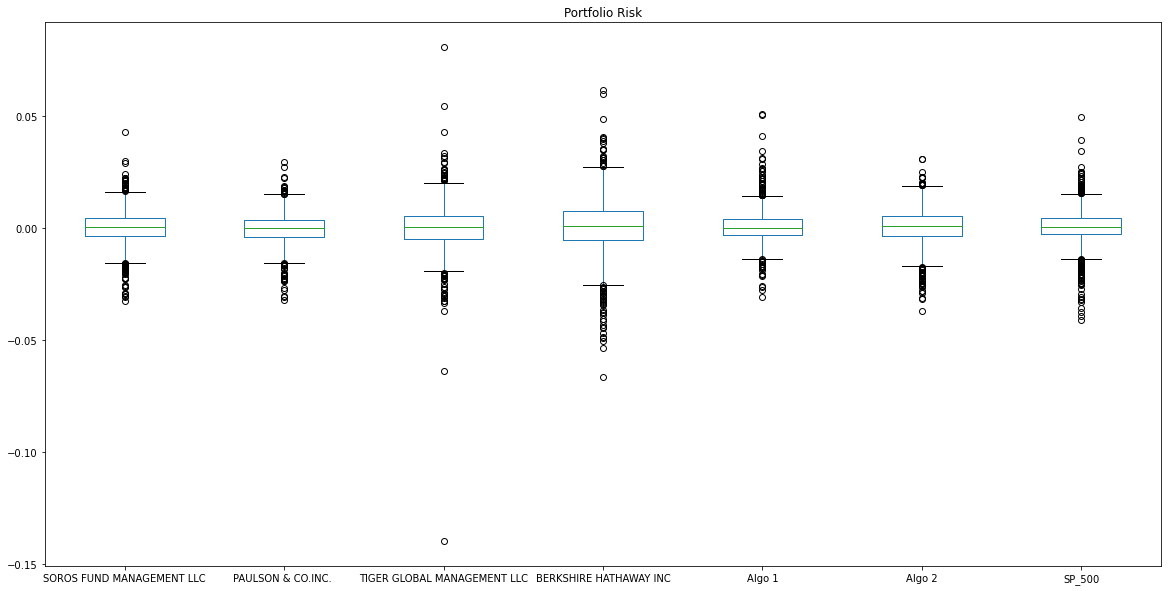

In [59]:
# Box plot to visually show risk
df_combine.plot(kind = "box", figsize = (20,10), title="Portfolio Risk")

### Calculate Standard Deviations

In [60]:
# Calculate the daily standard deviations of all portfolios
df_combine_std = pd.DataFrame(df_combine.std()).rename(columns= {0:"Std"})
df_combine_std

,Std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
SP_500,0.008554


### Determine which portfolios are riskier than the S&P 500

In [61]:
# Determine which portfolios are riskier than the S&P 500
Risker_portfolios = df_combine_std[df_combine_std["Std"] > df_combine_std.loc["SP_500", "Std"]]
Risker_portfolios

,Std
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


### Calculate the Annualized Standard Deviation

In [62]:
# Calculate the annualized standard deviation (252 trading days)
Annualized_std = df_combine_std * np.sqrt(252)
Annualized_std

,Std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
SP_500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-day rolling standard deviations'}, xlabel='Date'>

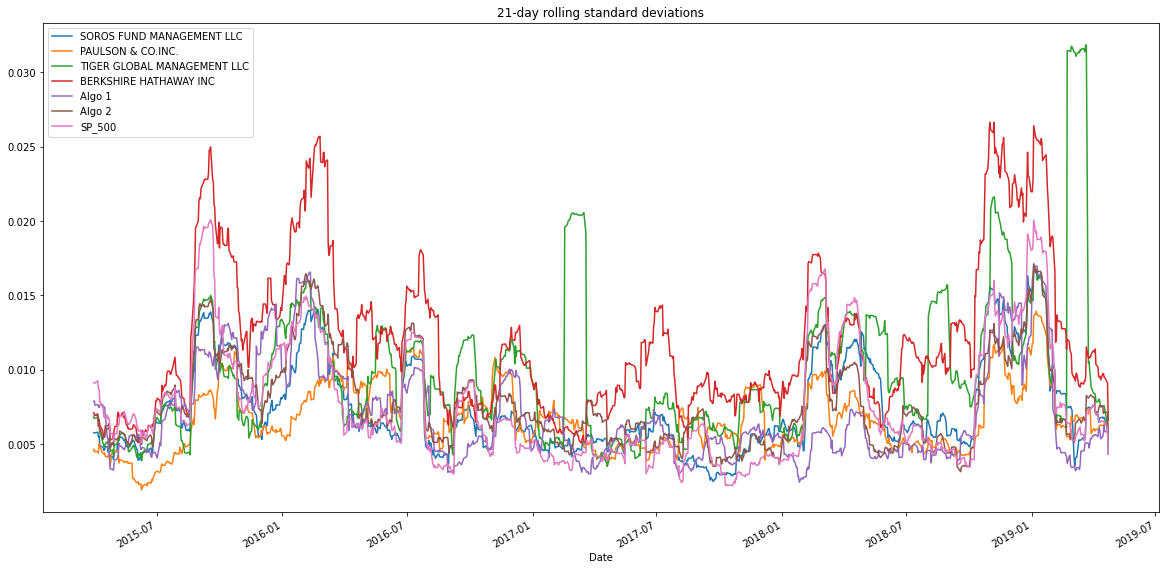

In [63]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21 = df_combine.rolling(window = 21).std()
# Plot the rolling standard deviation
rolling_21.plot(figsize=(20,10), title= "21-day rolling standard deviations")

### Calculate and plot the correlation

In [64]:
# Calculate the correlation
correlation_SP500 = df_combine.corr()

# Display de correlation matrix
correlation_SP500

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP_500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


Based on the above correlation table, Algo 2 most closely resembles the returns of the S&P 500 at an 85.87% correlation, followed closely by Soros Fund Management at 83.78%. Algo 1 least resembles the returns of the S&P 500, only correlating at 27.95%.

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC'}, xlabel='Date'>

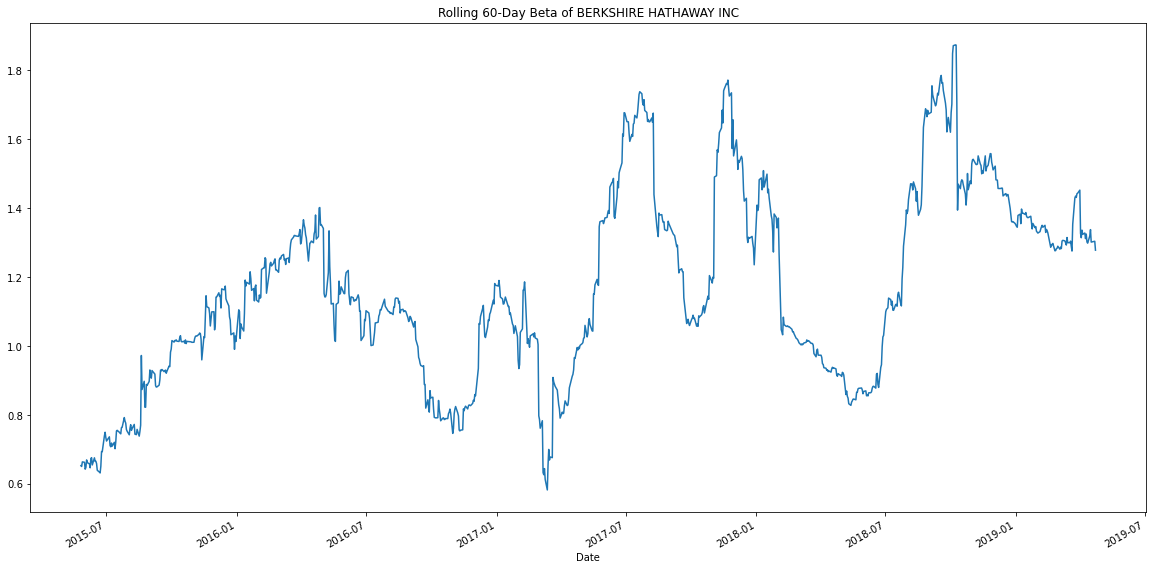

In [65]:
# Calculate covariance of a single portfolio
rolling_covariance_60 = df_combine['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(df_combine['SP_500'])
# Calculate variance of S&P 500
rolling_variance = df_combine['SP_500'].rolling(window=60).var()
# Computing beta
rolling_beta = rolling_covariance_60 / rolling_variance
# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

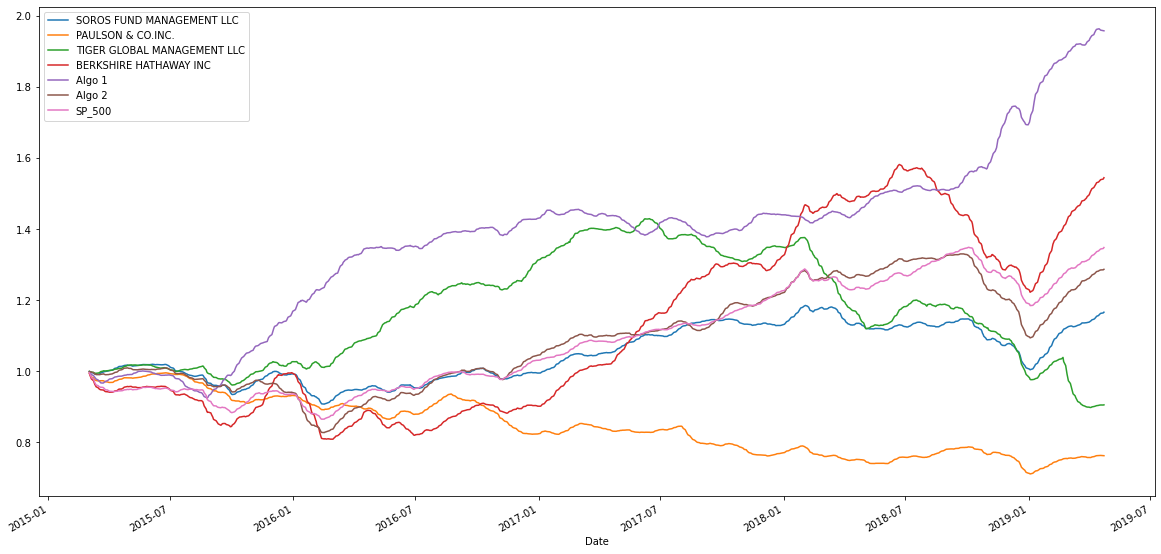

In [66]:
# Use `ewm` to calculate the rolling window
df_combine_ewm = df_combine.ewm(span = 21,adjust = False).mean()
(1+df_combine_ewm).cumprod().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [67]:
# Annualized Sharpe Ratios
sharpe_ratios = df_combine.mean()*252/(df_combine.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP_500                         0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

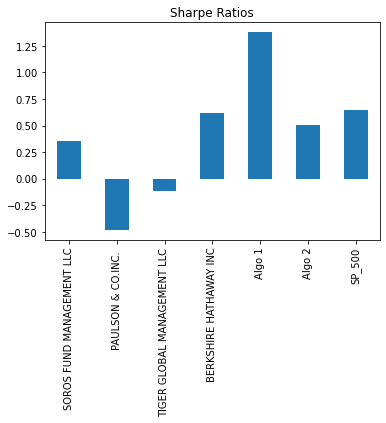

In [68]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 outperformed both market & Whales portfolios. Whereas Algo 2 underperformed the market and BERKSHIRE HATHAWAY INC.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [69]:
# Reading data from 1st stock
aapl= pd.read_csv(Path("Resources/aapl_historical.csv"), index_col="Trade DATE",parse_dates = True, infer_datetime_format= True)
aapl.rename(columns = {"NOCP":"aapl"}, inplace = True)
aapl.drop(columns=['Symbol'],inplace =True)
aapl.head()

,aapl
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [70]:
# Reading data from 2nd stock
goog= pd.read_csv(Path("Resources/goog_historical.csv"), index_col="Trade DATE",parse_dates = True, infer_datetime_format= True)
goog.rename(columns = {"NOCP":"goog"}, inplace = True)
goog.drop(columns=['Symbol'],inplace =True)
goog.head()

,goog
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [71]:
# Reading data from 3rd stock
cost= pd.read_csv(Path("Resources/cost_historical.csv"), index_col="Trade DATE",parse_dates = True, infer_datetime_format= True)
cost.rename(columns = {"NOCP":"cost"}, inplace = True)
cost.drop(columns=['Symbol'],inplace =True)
cost.head()

,cost
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [72]:
# Combine all stocks in a single DataFrame
Combine = pd.concat((aapl, cost, goog), axis = 1, join= "inner")
Combine.sort_index(ascending = True, inplace = True)
Combine.head()

,aapl,cost,goog
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [73]:
# Calculate daily returns
Combine_daily_retrun= Combine.pct_change()
# Drop NAs
Combine_daily_retrun.dropna(inplace = True)
# Display sample data
Combine_daily_retrun.head()

,aapl,cost,goog
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [74]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
Protfolio_weights = Combine_daily_retrun.dot(weights)
# Display sample data
Protfolio_weights.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [75]:
# Join your returns DataFrame to the original returns DataFrame
Protfolio_combined_returned= pd.concat((Protfolio_weights,df_combine), axis = 1, join = "inner")
Protfolio_combined_returned.rename(columns = {0:"New_Portfolio"}, inplace = True)
Protfolio_combined_returned.head()

,New_Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


In [76]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
Protfolio_combined_returned.isnull()
Protfolio_combined_returned.dropna(axis=0,inplace=True)
Protfolio_combined_returned.head()

,New_Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [77]:
# Calculate the annualized `std`
Combined_Portfolio = Protfolio_combined_returned.std() * np.sqrt (252)
Combined_Portfolio

New_Portfolio                  0.211496
SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
SP_500                         0.152054
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-day rolling standard deviation'}>

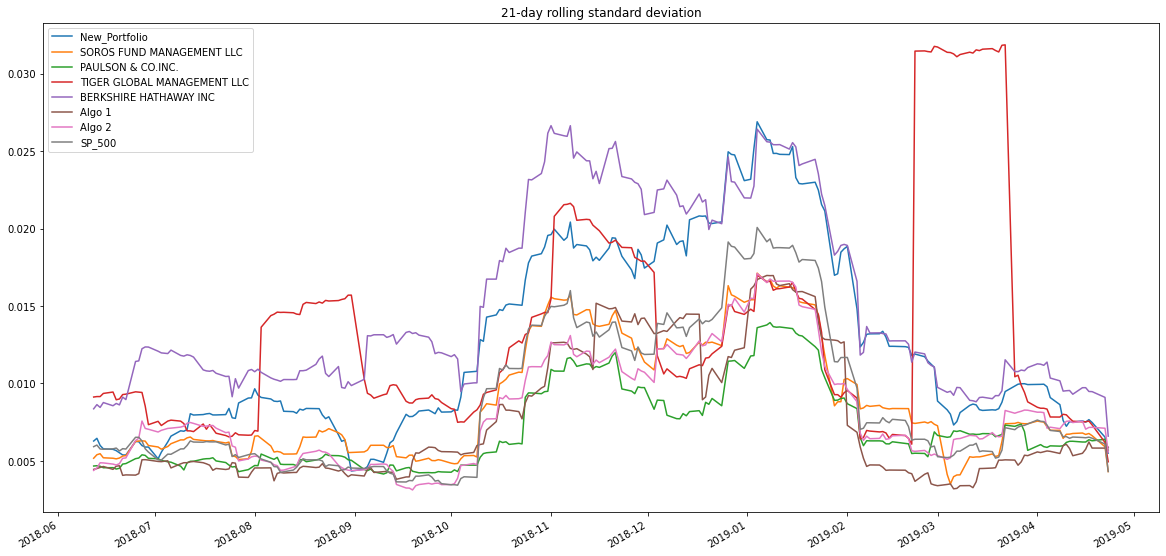

In [78]:
# Calculate rolling standard deviation and plot
Protfolio_combined_returned.rolling(window=21).std().plot(figsize=(20,10),title= "21-day rolling standard deviation")


### Calculate and plot the correlation

<AxesSubplot:>

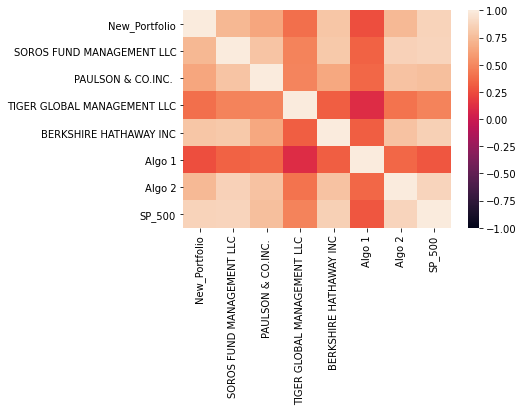

In [93]:
# Calculate and plot the correlation
Combined_Correlation = Protfolio_combined_returned.corr()
sns.heatmap(Combined_Correlation,vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

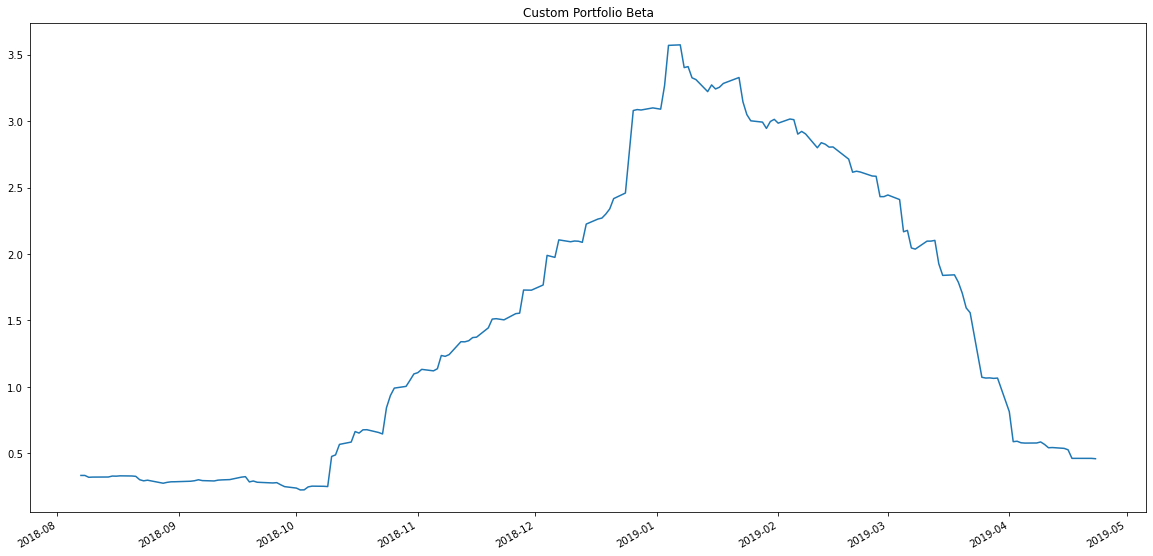

In [94]:
# Calculate and plot Beta
custom_covariance = Protfolio_combined_returned['New_Portfolio'].rolling(window=60).cov(Protfolio_combined_returned['SP_500'])
custom_covariance
variance_all = Protfolio_combined_returned['SP_500'].var()
Custom_beta = custom_covariance / variance_all
Custom_beta_plot = Custom_beta.plot(title="Custom Portfolio Beta", figsize=(20, 10))



### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [89]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_all = (Protfolio_combined_returned.mean() * 252) / (Protfolio_combined_returned.std() * np.sqrt(252))
sharpe_ratios_all

New_Portfolio                  0.933123
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
SP_500                         0.584820
dtype: float64

<AxesSubplot:>

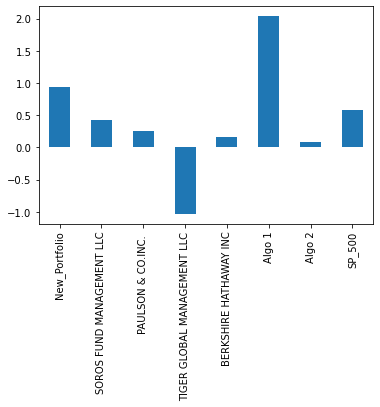

In [90]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.plot(kind="bar")

### How does your portfolio do?

Write your answer here!

.New_Portfolio did really well but still Algo 1 was the best as it had the highest sharpe ratio.